#**Animal Shelter Exploration**
----------------------------

###By Sayali Badole, Aryana Buelna, and Dylan Renn.


## **Introduction**

In this notebook we will be exploring data from the Sonoma County Animal Shelter. This data set includes information on all animals in the shelter. Specifically about the number of animals in the shelter, animals condition coming in/out of the shelter, how long their stay was, reason for intake, reason for release, age, and type/breed/color/sex of the animal. 


Our main focus will be exploring the data of cats and dogs at the shelter. We plotted the number of breeds most impounded, animals adopted, correlation between animal conditions and the reason they were released. We also explored why animals return back to the shelter, when the shelter is the busiest, and what effect did COVID-19 have on the animals.



The data set used is from the [Sonoma Animal Shelter](https://data.sonomacounty.ca.gov/Government/Animal-Shelter-Intake-and-Outcome/924a-vesw) and can also be found through a github link provided below. We accessed the data set April 4th, 2022. The data set from the Sonoma Animal Shelter is regularly updated and was last updated April 14th, 2022.


First we will import some of the Python packages to be used.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy.stats import chi2_contingency

## **Initial Data Exploration**

Reading the raw data from the given URL and storing it in a dataframe.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/grbruns/cst383/master/sonoma-shelter-12-2022.csv')

Let's starting off with getting to know the data. Here are the first few rows of the dataset.

In [3]:
df.head()

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
0,REMY,DOG,BEAGLE,BLACK/WHITE,Female,MED,04/11/2014,K21-039564,DS69,A406645,...,PHONE,RETURN TO OWNER,OVER THE COUNTER_WEB,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95407.0,"95407(38.403734, -122.736775)",1
1,*RONDE,DOG,CHIHUAHUA SH,TAN,Neutered,SMALL,07/24/2020,K21-039133,DA30,A406003,...,FIELD,ADOPTION,SCAS WEB,HEALTHY,HEALTHY,SANTA ROSA,*PETALUMA,94954.0,"94954(38.245316, -122.59871)",1
2,*SNOOP,CAT,DOMESTIC SH,GRAY,Neutered,SMALL,08/04/2019,K21-039232,CA02,A406151,...,FIELD,ADOPTION,SCAS WEB,HEALTHY,HEALTHY,SANTA ROSA,SANTA ROSA,95405.0,"95405(38.439152, -122.672541)",1
3,FIFI,CAT,SIAMESE,SEAL PT,Spayed,KITTN,10/27/2020,K21-037796,CA03,A402286,...,OVER THE COUNTER,ADOPTION,SCAS WEB,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95407.0,"95407(38.403734, -122.736775)",1
4,*MERLIN,CAT,DOMESTIC SH,BRN TABBY,Neutered,SMALL,01/16/2018,K21-037709,CS05,A402139,...,PHONE,ADOPTION,SCAS WEB,UNKNOWN,PENDING,SANTA ROSA,COUNTY,94952.0,"94952(38.236012, -122.730241)",1


We can see that there are 24 different columns, the first few rows gives us an idea about the type of data in the columns. 

To get a more concise summary of the dataframe:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22108 entries, 0 to 22107
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  16406 non-null  object 
 1   Type                  22108 non-null  object 
 2   Breed                 22108 non-null  object 
 3   Color                 22108 non-null  object 
 4   Sex                   22108 non-null  object 
 5   Size                  22075 non-null  object 
 6   Date Of Birth         16709 non-null  object 
 7   Impound Number        22108 non-null  object 
 8   Kennel Number         22099 non-null  object 
 9   Animal ID             22108 non-null  object 
 10  Intake Date           22108 non-null  object 
 11  Outcome Date          21972 non-null  object 
 12  Days in Shelter       22108 non-null  int64  
 13  Intake Type           22108 non-null  object 
 14  Intake Subtype        22108 non-null  object 
 15  Outcome Type       

We can see that the data cansists of 22108 enteries/rows and 24 features/columns. Most of the columns have object(String) values. The only numeric data types are zip codes(floating/decimal values), days in shelter and count(integer values). 

----------------
Short description of each feature in the dataset:

|Coloumn Name|Description|
|---|---|
|Name|Name of the animal|
|Type|Type of animal|
|Breed|Breed of animal|
|Color|Color of animal|
|Sex|Male, Female, Neutered Male, Spayed Female|
|Size|Large, medium, small|
|Date Of Birth|Approximate date of birth.|
|Impound Number|Animal impound number
|Kennel Number|Kennel number indicating its current location.
|Animal ID	|Unique ID
|Intake Date|Date animal was taken into the shelter
|Outcome Date	|Date animal left the shelter
|Days in Shelter|Number of days the animal was in the shelter|
|Intake Type|Reason for intake
|Intake Subtype	|Sub reason for intake
|Outcome Type	|Reason for release from shelter
|Outcome Subtype|Sub reason for release from shelter
|Intake Condition	|Animals condition at intake
|Outcome Condition	|Animals condition at release from shelter
|Intake Jurisdiction	|Jurisdiction responsible for animal intake
|Outcome Jurisdiction	|Area animal went to.
|Outcome Zip Code	|Zip code where animal went to.
|Location	|Latitude, Longitude coordinates for outcome jurisdiction
|Count	|Column for performing arithmetic and creating groups for views and visualizations

Let's look at more statistical details of the dataset.

In [5]:
df.describe().round(2)

,Days in Shelter,Outcome Zip Code,Count
count,22108.00,18924.00,22108.00
mean,17.52,95006.55,1.00
std,34.42,3863.69,0.05
min,0.00,1922.00,0.00
25%,1.00,95401.00,1.00
50%,8.00,95404.00,1.00
75%,22.00,95436.00,1.00
max,1239.00,99701.00,1.00


In the 'Days in Shelter' coloumn, the last row shows the maximum number of days animal(s) have stayed at the shelter which is 1239 days/approx 40 months, while the average is just 17 days! Even the 75 percentile value is 22 days. This could mean that either very few animals stay at the shelter for a long time or there are some outliers.

Let's look for outliers:

In [6]:
df[df['Days in Shelter'] == df['Days in Shelter'].max()]

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
829,CHARLIE,DOG,GOLDEN RETR,GOLD,Neutered,LARGE,10/27/2014,K18-028173,FREEZER,A319664,...,FLD_CORONR,DISPOSAL,DOA,UNKNOWN,DEAD,COUNTY,COUNTY,94952.0,"94952(38.236012, -122.730241)",1


We can see that this dog was in the shelter for 1,239 days. The outcome condition and outcome type says that he was dead and disposed. It could be possible that his death was unrecognized by the shelter authorities and hence the record of his "days at the shelter" is inaccurate. 

In [7]:
df.nunique()

Name                     6080
Type                        3
Breed                     977
Color                     327
Sex                         5
Size                        7
Date Of Birth            5223
Impound Number          22108
Kennel Number             162
Animal ID               19994
Intake Date              2771
Outcome Date             2449
Days in Shelter           262
Intake Type                 7
Intake Subtype             29
Outcome Type                9
Outcome Subtype           227
Intake Condition            5
Outcome Condition           6
Intake Jurisdiction        13
Outcome Jurisdiction       12
Outcome Zip Code          635
Location                  635
Count                       2
dtype: int64

After looking at the unique values, we can group some of the variables that would be used ahead for the visualization accordingly:

>**Discrete**: Name, date of birth, intake date, outtake date, days in shelter.

>**Categorical**: Type, Sex, Size, intake type and condition , outcome type and condition.

>**Boderline categorical**: Breed, color, location.




What type of animal is most found at the shelter?

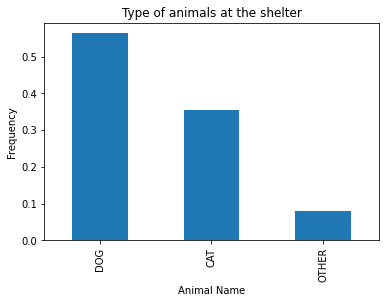

In [8]:
df['Type'].value_counts(normalize=True).plot.bar()
plt.title('Type of animals at the shelter')
plt.xlabel('Animal Name')
plt.ylabel('Frequency');

This plot shows that the majority of the animal poplulation at the shelter consists of cats and dogs. 

With approximately:
*   55-57% dogs
*   35%    cats
*   8-10%  other species

What are these "OTHER" species?
> Apart from dogs and cats, what other animals are at the shelter?

Since there are a lot of other species, let's just look at the top 10 species based on their population. 

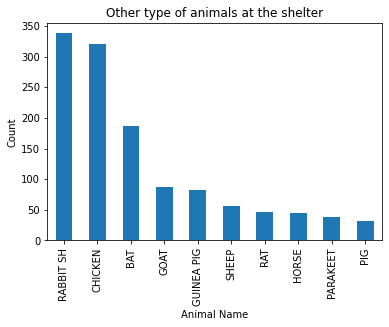

In [9]:
df[df['Type']=='OTHER']['Breed'].value_counts()[:10].plot.bar();
plt.title('Other type of animals at the shelter')
plt.xlabel('Animal Name')
plt.ylabel('Count');

These top 10 other species at the shelter include: 

rabbits, chickens, bats, goats, guinea pigs, sheeps, rats, horses, parakeets, and pigs.

Which breeds of dogs and cats are the most found at the shelter?

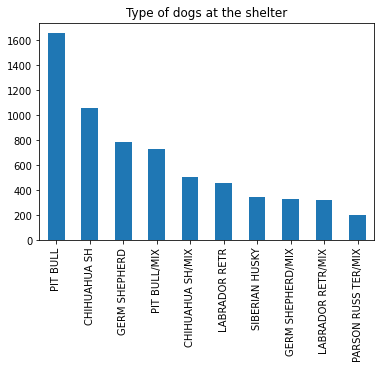

In [10]:
df[df['Type']=='DOG']['Breed'].value_counts()[:10].plot.bar()
plt.title("Type of dogs at the shelter");

This bar plot shows the top 10 different dog breeds at the shelter and their count. 

From this plot we can see that Pit Bulls make up for most of the dog population at the shelter.

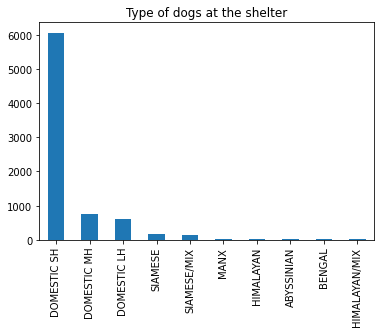

In [11]:
df[df['Type']=='CAT']['Breed'].value_counts()[:10].plot.bar(); 
plt.title("Type of dogs at the shelter");

Here we can see that Domestic Short Hair Cats are most seen in the shelter.

These two bar plots show that there is a more diverse dog breed population in comparison to cat breeds in the animal shelter. 

What is the age of these animals at the shelter?
> Even if we don't have a column that tells us about the age of an animal, we can calculate it using the Date Of Birth Column.

In [12]:
df['Date Of Birth'] = pd.to_datetime(df['Date Of Birth'])
def get_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
df['Age']= df['Date Of Birth'].apply(lambda x: get_age(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22108 entries, 0 to 22107
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Name                  16406 non-null  object        
 1   Type                  22108 non-null  object        
 2   Breed                 22108 non-null  object        
 3   Color                 22108 non-null  object        
 4   Sex                   22108 non-null  object        
 5   Size                  22075 non-null  object        
 6   Date Of Birth         16709 non-null  datetime64[ns]
 7   Impound Number        22108 non-null  object        
 8   Kennel Number         22099 non-null  object        
 9   Animal ID             22108 non-null  object        
 10  Intake Date           22108 non-null  object        
 11  Outcome Date          21972 non-null  object        
 12  Days in Shelter       22108 non-null  int64         
 13  Intake Type     

Since the values in the Data Of Birth column are object types, we can convert them into dates(datetype64 type). We then use a function to get the age by the formula : **Today's Date - Date of Birth**. Now we can create a new column 'Age' to store all the values. 

Similarly we can change other dates in the columns of the data set:

In [13]:
df['Intake Date'] = pd.to_datetime(df['Intake Date'])
df['Outcome Date'] = pd.to_datetime(df['Outcome Date'])

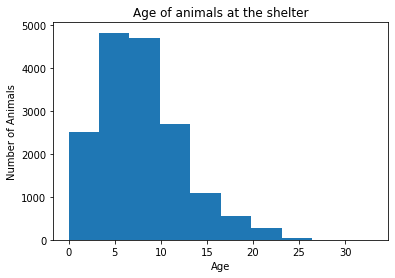

In [14]:
df['Age'].plot.hist()
plt.title('Age of animals at the shelter')
plt.xlabel('Age')
plt.ylabel('Number of Animals');

This plot shows that most of the animals in the shelter are between the ages of 4 to 10. 

Since the graph is skewed we can say that the majority of the animals at the shelter are young. 

Now lets see how long the animals stay in the shelter?

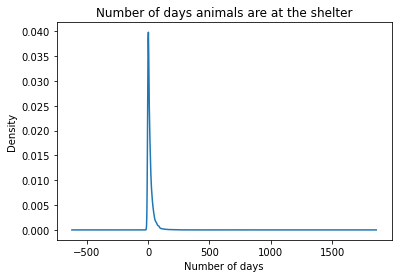

In [15]:
df['Days in Shelter'].plot.density()
plt.title('Number of days animals are at the shelter')
plt.xlabel('Number of days');

As it can bee seen from the graph the majority of the animals stay in the shelter for the period of 15-20 days.  

## Data cleaning and preprocessing

How many NA values does the dataset have?


In [16]:
df.isna().sum()

Name                    5702
Type                       0
Breed                      0
Color                      0
Sex                        0
Size                      33
Date Of Birth           5399
Impound Number             0
Kennel Number              9
Animal ID                  0
Intake Date                0
Outcome Date             136
Days in Shelter            0
Intake Type                0
Intake Subtype             0
Outcome Type             142
Outcome Subtype          441
Intake Condition           0
Outcome Condition        471
Intake Jurisdiction        0
Outcome Jurisdiction    3105
Outcome Zip Code        3184
Location                3184
Count                      0
Age                     5399
dtype: int64

We can see that some columns have more NA values than others. 

This also shows that most of the NA values come from Outcome Jurisdiction, Location, and Zip Code meaning the Animal Shelter does not know the area/location animals go to after release from the shelter.

Our next step is to now clean the data set. 

Below is the percentage of NA values before we start the data cleaning.

In [17]:
df.isna().mean().mean()

0.04922200108557988

It is almost 5% of the total values. 

Since we will be looking at only the data of dogs and cats, we will be dropping the rows of the dataset with other animal types.

In [18]:
df=df[(df['Type']=='DOG') | (df['Type']=='CAT')]

Removing the colums we won't be using for our project

In [19]:
df.drop(['Name','Impound Number','Kennel Number','Intake Subtype','Location','Outcome Zip Code', 'Count'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Treating bad data: Imputing values such as "UNKNOWN" and "PENDING" to NA values

In [20]:
df= df.replace(["UNKNOWN", "Unknown","PENDING"], np.nan)

Modifying values: Converting "Treatable/Rehab" and "Treatable/Manageable" into a general term "Treateable" for intake and outcome condition. 

In [21]:
df= df.replace(["TREATABLE/REHAB", "TREATABLE/MANAGEABLE"], "TREATABLE")

Let's look at the NA values in each row. We can drop the rows where most of the values are NA.

In [22]:
df.isna().sum(axis=1).value_counts()

0    11454
2     3213
1     2722
3     1591
4     1003
5      252
6       54
8       20
7       17
dtype: int64

This means that 11486 rows have 1 NA value in them, 3235 rows have 2 NA values and so on...

It's best to drop rows with more than 3 NA values

In [23]:
df.drop(df[df.isna().sum(axis=1)>3].index, inplace=True)

Percentage of NA values after cleaning

In [24]:
df.isna().mean().mean()

0.04074757054209109

## Data exploration and visualization

Here we start exploring data related to cats and dogs in the shelter.

Does the reason for release from the shelter depend on if the animal is a cat or a dog?

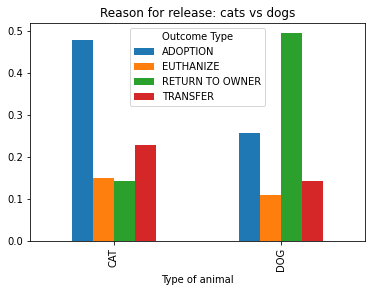

In [25]:
df_type = df[  (df['Type'] == 'DOG') | (df['Type'] == 'CAT') ]
df_adopt = df[  (df['Outcome Type'] == 'ADOPTION') | (df['Outcome Type'] == 'EUTHANIZE') | (df['Outcome Type'] == 'RETURN TO OWNER') | (df['Outcome Type'] == 'TRANSFER')]
pd.crosstab(df_type['Type'], df_adopt['Outcome Type'], normalize='index').plot.bar()
plt.title('Reason for release: cats vs dogs')
plt.xlabel('Type of animal');

For how long do the cats and dogs stay at the shelter before getting adopted or returned to the owner

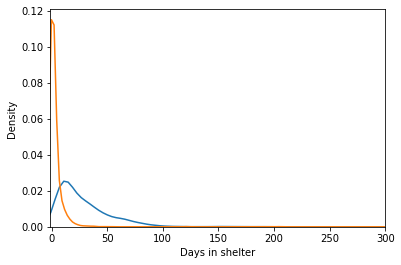

In [26]:
df_cat=df[(df['Type']=='CAT') & (df['Outcome Type']=='ADOPTION')]
df_dog=df[(df['Type']=='DOG')  & (df['Outcome Type']=='RETURN TO OWNER')] 
sns.kdeplot(data=df_cat, x="Days in Shelter")
sns.kdeplot(data=df_dog,x="Days in Shelter")
plt.xlim(-1, 300)
plt.xlabel("Days in shelter");


Clearly, dogs stay at the shelter for a shorter time before getting returned to the owner, while cats stay at the shelter for a slightly longer time and then ultimately get adopted. The number of days for the cats could be greater because most of the cats are domestic whereas dogs are of breeds people usually have as pets. Hence, it could be poosible people leave their dogs at the shelter to get them treated and then take them back.

From the plot we can see that cats are adopted more than dogs. While dogs are mostly returned back to their owners unlike cats. 


What is the amount of dogs available for adoption compared to cats available for adoption in the shelter?



Is there any relation between the condition of the animals during their intake/outcome and the reason they enter/are released from the shelter?

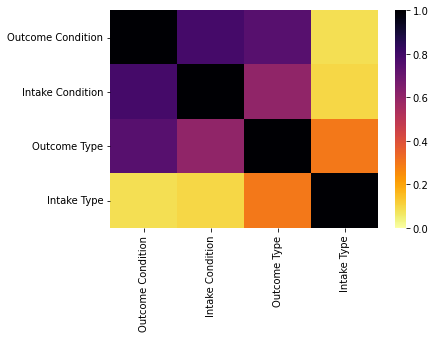

In [27]:
def cramers_v(x, y):
  confusion_matrix = pd.crosstab(x,y)
  chi2 = chi2_contingency(confusion_matrix)[0]
  n = confusion_matrix.sum().sum()
  phi2 = chi2/n
  r,k = confusion_matrix.shape
  phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
  rcorr = r-((r-1)**2)/(n-1)
  kcorr = k-((k-1)**2)/(n-1)
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

xs = np.array(['Outcome Condition', 'Intake Condition', 'Outcome Type', 'Intake Type'])
n = len(xs)

cor_mtx = np.zeros([n, n])
for i in range(n):
  for j in range(n):
    cor_mtx[i,j] = cramers_v(df[xs[i]], df[xs[j]])

sns.heatmap(cor_mtx, cmap='inferno_r', vmin=0, vmax=1, xticklabels=xs, yticklabels=xs); 

We can see that there is a very high corelation between the intake condition and outcome condition: What does it say about the overall health of animals at the shelter? Does it improve? Does it say anythoing about the quality of the shelter?


How many treatable animals were infact treated at their days at the shelter?

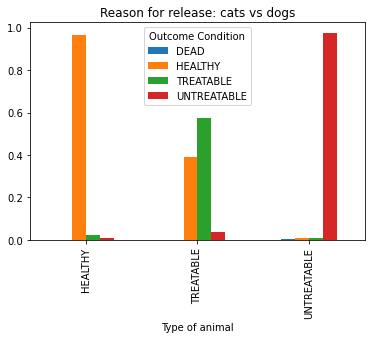

In [28]:
df_int = df[(df['Intake Condition'] == 'TREATABLE') |(df['Intake Condition'] == 'UNREATABLE')]
df_out = df[  (df['Outcome Condition'] == 'HEALTHY') | (df['Outcome Type'] == 'TREATABLE') | (df['Outcome Type'] == 'UNTREATABLE') | (df['Outcome Type'] == 'DEAD')]
pd.crosstab(df_type['Intake Condition'], df_adopt['Outcome Condition'], normalize='index').plot.bar()
plt.title('Reason for release: cats vs dogs')
plt.xlabel('Type of animal');

It can be seen that a fairly large portion of animals that had treatable conditions during their intake made it out of the shelter healthy! Most of the animals that came in the shelter healthy had good health during their days at the shelter and at their release. Also, very few untreatable animals died. 

This explains us a lot about the quality of the shelter. It means that the shelter took good care of the animals and treated their health as a priority. 

Do animals return back to the shelter? Why?
> How many times does an animal return back to the shelter can be known by their Animal ID number. Let's find out the top 10 animals that returned to the shelter the most. 


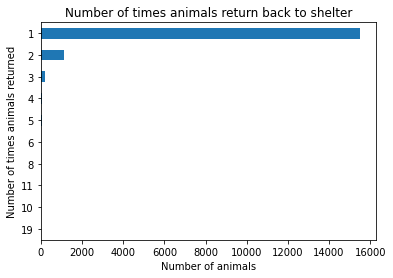

In [29]:
(df['Animal ID'].value_counts()).value_counts().sort_values().plot.barh()
plt.title('Number of times animals return back to shelter')
plt.xlabel('Number of animals')
plt.ylabel('Number of times animals returned');

A lot of animals returned back atleast once. It can be also seen from the graph that a very small amount of animals came back more than 5 times. Let's look more into it...

In [30]:
(df['Animal ID'].value_counts()).value_counts().sort_values()[:6]

19     1
10     1
11     2
8      4
6     13
5     30
Name: Animal ID, dtype: int64

One particular animal was returned back to the shelter 19 times! Why?

In [31]:
df[(df['Animal ID']=='A322298')][:1]

,Type,Breed,Color,Sex,Size,Date Of Birth,Animal ID,Intake Date,Outcome Date,Days in Shelter,Intake Type,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Age
3768,DOG,FRENCH BULLDOG/MIX,BROWN/WHITE,Spayed,SMALL,2013-05-21,A322298,2019-12-07,2019-12-10,3,CONFISCATE,RETURN TO OWNER,OVER THE COUNTER_PRVS,NaN,NaN,SANTA ROSA,SANTA ROSA,8.0


From the data set it can be seen that Layla the dog has returned back to the shelter 19 times within the span of 2 years. Every time Layla was brought into the shelter the Intake Type was because she was confiscated. 

Confiscations are usually carried out when someone is severly abusing or neglecting an animal(s). The intake subtype says "fld_hospital" and "fld_arrest" - it could be because the dog was treated poorly and had to be taken care of multiple times by the shelter.

Now we move onto some data related to COVID-19 and the animal shelter.


Were any animals in the shelter isolated during the COVID outbreak?

> Did people keep their pets in the shelter during the covid year - 2020? For how many days?


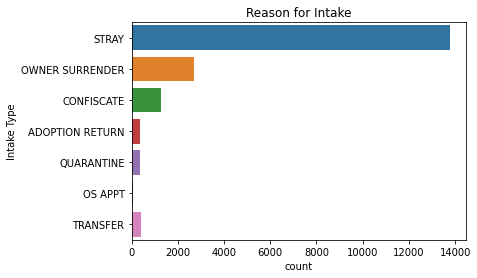

In [32]:
sns.countplot(y='Intake Type', data=df)
plt.title('Reason for Intake');

We can see that a small percentage of animals were "quarantined". Is it because of Covid? Let's find out what year the animals were quarantined the most. 

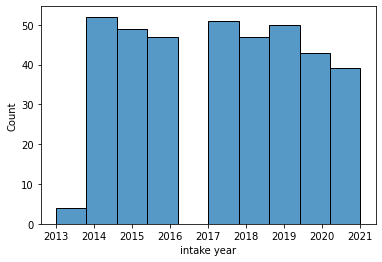

In [33]:
df['intake year'] = df['Intake Date'].dt.year
df_quar= df[(df['Intake Type']=='QUARANTINE')]
sns.histplot(df_quar['intake year']); 

The number of animals that were "quarantined" is almost steady for all the years. The animals could have been quarantined due to different reasons that is not related to covid. 

For what duration were these animals quarantined in the year 2020?

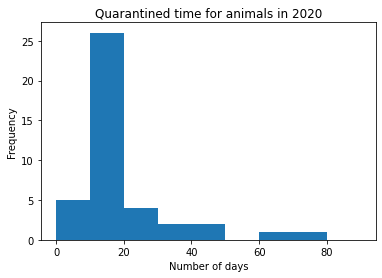

In [34]:
df_quar=df[(df['Intake Type']=='QUARANTINE') & (df['intake year']==2020)]
df_quar['Days in Shelter'].plot.hist(bins=list(range(0,100,10)))
plt.title('Quarantined time for animals in 2020')
plt.xlabel('Number of days');                            

Majority of animals were quarantined for 10-20 days in the shelter. The time period is similar to the general covid isolation period. It could be posible these animals were quarantined for precautionary measures because there was a covid outbreak among the people working at the shelter. 

Did the COVID outbreak affect the number of animals that stayed at the shelter?

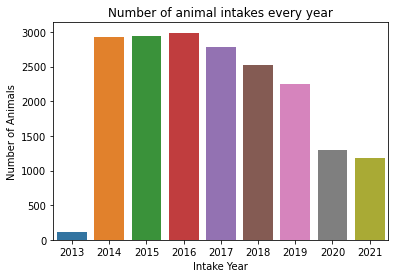

In [35]:
sns.countplot(x='intake year', data=df)
plt.title("Number of animal intakes every year")
plt.xlabel("Intake Year")
plt.ylabel("Number of Animals");

Apart from 2013 (the year the animal shelter started), 2020 and 2021 were the years the shelter saw the least number of animal intakes. The covid outbreak and the lockdown definetiely affected the owner surrenders, transfers from other shelters, adoption returns etc.

Why do some shelters put down their animals?
> Shelters euthanize the animals when they are considered unadoptable, due to agressive tendencies, animals that are too old, have incurable illnesses or animals who remain at the shelter for too long.

What percent of animals were euthanized due to their agressive tendencies?

In [36]:
df_agg=df[df["Outcome Subtype"]=="AGGRESSIVE"]
df_agg["Outcome Type"].value_counts()

EUTHANIZE    913
Name: Outcome Type, dtype: int64

It can be seen that all 100% of the animals that are aggressive are Euthanized. Does the shelter only euthanize animals based on their behavior? What about the type? 

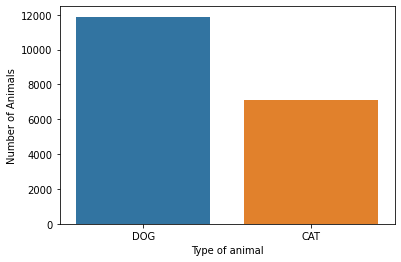

In [37]:
df_eut= df[df["Outcome Type"]=="EUTHANIZE"]
sns.countplot(data=df, x="Type")
plt.xlabel("Type of animal")
plt.ylabel("Number of Animals");

Clearly, more dogs are euthanized than cats - could be because most the dogs initially belonged to some owner and hence had got the "humanely death" under observation while most of the cats were domestic.

Are older animals have a higher chances of getting euthanized?

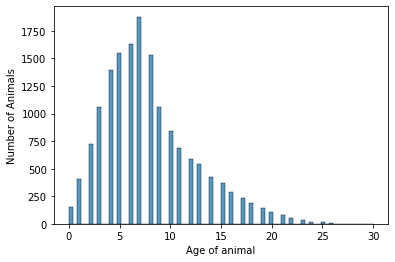

In [38]:
sns.histplot(data=df, x="Age")
plt.xlabel("Age of animal")
plt.ylabel("Number of Animals");

Animals in the age range of 5-10 are euthanized the most. The average life span of dogs and cats is around 10-12 years. They do get euthanized at a fairly young age. 

Next, lets look at the times at which the shelter is at its buisiest, and when it is relatively quiet. 

When is the animal shelter the buisest? 
>Which year was the buisiest? What days of the week? 

In [39]:
df_busy=df['Intake Date']

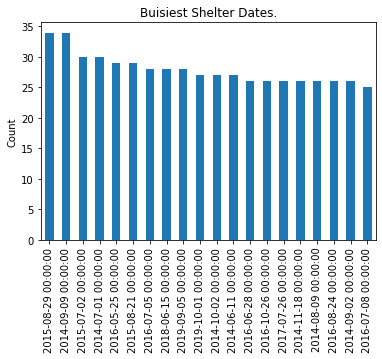

In [40]:
df_busy.value_counts()[:20].plot.bar();
plt.ylabel('Count')
plt.title('Buisiest Shelter Dates.');

We can see that by Intake date, all of the 20 busiest dates are all within the range of 05-11 (May to November) so we can assume that the shelter is at its busiest from the time of summer to late fall/early winter. 

Lets see if there was any significant reason that 08/29/2015 had some many animals go into the shelter. Could it be that these are the dates that the shelter recieved the most transfers from other shelters?

In [41]:
Aug29 = df[df['Intake Date'] == '2015-08-29 00:00:00']
Aug29.head(5)

,Type,Breed,Color,Sex,Size,Date Of Birth,Animal ID,Intake Date,Outcome Date,Days in Shelter,Intake Type,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Age,intake year
1866,DOG,COCKER SPAN/MIX,GOLD,Male,MED,2007-08-17,A285729,2015-08-29,2015-09-01,3,STRAY,RETURN TO OWNER,OVER THE COUNTER_WEB,HEALTHY,HEALTHY,COUNTY,COUNTY,14.0,2015
2715,DOG,CHIHUAHUA SH,WHITE,Neutered,TOY,2012-03-01,A326432,2015-08-29,2015-09-03,5,CONFISCATE,RETURN TO OWNER,OVER THE COUNTER_PRVS,HEALTHY,HEALTHY,COUNTY,COUNTY,10.0,2015
3250,CAT,DOMESTIC SH,TORTIE,Spayed,KITTN,2015-05-11,A326430,2015-08-29,2015-09-12,14,OWNER SURRENDER,ADOPTION,INTERNET,HEALTHY,HEALTHY,COUNTY,COUNTY,6.0,2015
3546,DOG,CHIHUAHUA SH,BROWN,Spayed,TOY,2005-09-01,A326435,2015-08-29,2015-09-03,5,CONFISCATE,RETURN TO OWNER,OVER THE COUNTER_NOTICE,TREATABLE,TREATABLE,COUNTY,COUNTY,16.0,2015
4796,CAT,DOMESTIC SH,BUFF,Neutered,SMALL,2007-09-01,A326443,2015-08-29,2015-09-03,5,CONFISCATE,RETURN TO OWNER,OVER THE COUNTER_PRVS,HEALTHY,HEALTHY,COUNTY,COUNTY,14.0,2015


There doesn't seem to be any significant correlation between Intake type and the date, so it may just be that the shelter is just natrually busy during the months of May to November.

Instead, lets look at the 20 busiest days purely based on Outcome Date.

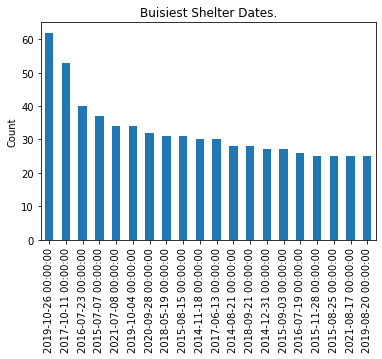

In [42]:
df_busy=df['Outcome Date']
df_busy.value_counts()[:20].plot.bar();
plt.ylabel('Count')
plt.title('Buisiest Shelter Dates.');

The dates of 10/26/2019 and 10/11/2017 are especially high, lets take a look at the animals that were brought into the shelter on those dates, to see if there was anything significant that may have happened on those dates. 

In [43]:
Oct1 = df[(df['Intake Date'] == '2019-10-26 00:00:00') | (df['Outcome Date'] == '2019-10-26 00:00;')]
Oct1.head(5)

,Type,Breed,Color,Sex,Size,Date Of Birth,Animal ID,Intake Date,Outcome Date,Days in Shelter,Intake Type,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Age,intake year
2418,CAT,DOMESTIC SH,TORTIE,Female,KITTN,2019-08-08,A393282,2019-10-23,2019-10-26,3,STRAY,TRANSFER,HSSC,NaN,HEALTHY,SANTA ROSA,COUNTY,2.0,2019
2957,DOG,PARSON RUSS TER/MIX,TAN,Neutered,SMALL,2015-04-06,A343241,2019-10-25,2019-10-26,1,OWNER SURRENDER,TRANSFER,ARF,HEALTHY,HEALTHY,COUNTY,OUT OF COUNTY,7.0,2019
3025,DOG,CHIHUAHUA LH,BROWN,Spayed,SMALL,2017-10-03,A391990,2019-10-03,2019-10-26,23,CONFISCATE,TRANSFER,HSSC,HEALTHY,HEALTHY,SANTA ROSA,COUNTY,4.0,2019
3076,DOG,AUST CATTLE DOG/MIX,BLUE MERLE/TAN,Male,MED,NaT,A393224,2019-10-20,2019-10-26,6,STRAY,TRANSFER,HSSC,HEALTHY,HEALTHY,COUNTY,COUNTY,NaN,2019
3265,CAT,DOMESTIC SH,GRAY TABBY,Female,KITTN,2019-06-25,A393335,2019-10-25,2019-10-26,1,STRAY,TRANSFER,ARF,NaN,HEALTHY,COUNTY,OUT OF COUNTY,2.0,2019


It looks like most of the animals that have an outcome date of 10/26/2019 all had an outcome type of 'TRANSFER'.This could mean that by looking for the busiest dates of the shelter, we could be just looking at the dates that the shelter transfers the most animals. 

## Conclusions

In conclusion, we learned a lot of different things about the Sonoma County Animal shelter. For one, we learned that at this shelter, there are more cats adopted than dogs. However at the saem time, it is more likely dogs get returned to their owner, so the shelter may have a tendancy to return lost dogs and have surplus of strays cats waiting to be adopted. We also learned that although cats are adopted more, they are also transfered and euthanized more often, so although more cats get adopted, dogs may be more likely to be adopted. We looked at some of the intake and outake conditions of animals who were placed in the shelter to see if there was any correlation, or change in their condition when the animal left. We discovered that most animals who came in healthy, also left healthy, and animals that were deemed treatable were mostly taken care of. It shows the high quality and standards that are held at the Sonoma shelter, and the trust that people have in the shelter to take care of their pets. 
> As a group, we also looked into how the COVID 19 outbreak could have affected the shelter, as well as the time that the shelter might be the most busy. While it did not look like the number of animals that were quarantined changed, the length in time was around 14 days, which was the inital standard isolation period. The overall number of animal intakes also decreased during the years of COVID-19 by a significant messure. Finally, we can make a general assumption, based on intake and outake date patterns within the shelter, that the shelter is at its busiest overall time during the months of May-Novermber. We overall learned a lot about the Sonoma County Animal shelter, and how we can interpret different types of data to make educated assumptions about the shelter. 